In [243]:
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [250]:
def read_data():
    with open("14_input.txt", "r") as f:
        xs = []
        ys = []
        vxs = []
        vys = []
        for line in f:
            p, v = line.split(" ")
            x, y = [int(n) for n in p[2:].split(",")]
            vx, vy = [int(n) for n in v[2:].split(",")]
            xs.append(x)
            ys.append(y)
            vxs.append(vx)
            vys.append(vy)
        x = np.array(xs)
        y = np.array(ys)
        vx = np.array(vxs)
        vy = np.array(vys)
    return x, y, vx, vy

In [251]:
x, y, vx, vy = read_data()
dx = 101
dy = 103
n = 100
for i in range(n):
    x = (x + vx) % dx
    y = (y + vy) % dy
dx2 = dx // 2
dy2 = dy // 2
q1 = np.sum((x < dx2) & (y < dy2))
q2 = np.sum((x > dx2) & (y < dy2))
q3 = np.sum((x < dx2) & (y > dy2))
q4 = np.sum((x > dx2) & (y > dy2))
print(q1 * q2 * q3 * q4)

231852216


In [252]:
x, y, vx, vy = read_data()
n = 10000
qs = np.zeros((4, n))
qs2 = np.zeros(n)
qs3 = np.zeros(n)
for i in range(n):
    x = (x + vx) % dx
    y = (y + vy) % dy
    q1 = np.sum((x < dx2) & (y < dy2))
    q2 = np.sum((x > dx2) & (y < dy2))
    q3 = np.sum((x < dx2) & (y > dy2))
    q4 = np.sum((x > dx2) & (y > dy2))
    qs2[i] = max(q1, q2, q3, q4) - min(q1, q2, q3, q4)
    qs3[i] = min(q1, q2, q3, q4)
    qs[0, i] = q1
    qs[1, i] = q2
    qs[2, i] = q3
    qs[3, i] = q4

In [253]:
t = np.arange(n)
fig = go.Figure()
for i in range(4):
    fig.add_scatter(x=t, y=qs[i,:])
fig

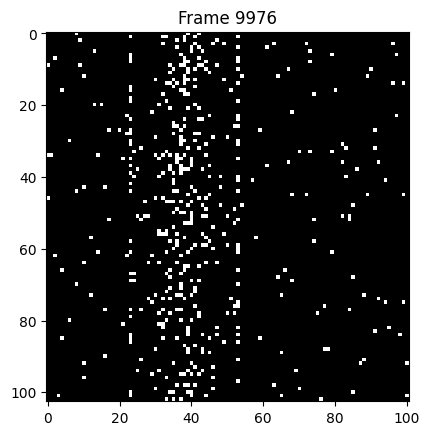

In [254]:
x, y, vx, vy = read_data()
for i in range(10000):
    x = (x + vx) % dx
    y = (y + vy) % dy
    if (i - 78) % 101 == 0:
        m = np.zeros((dy, dx))
        m[y, x] = 1
        clear_output(wait=True)
        fig, ax = plt.subplots()
        ax.imshow(m, cmap="gray")
        ax.set_title(f"Frame {i}")
        plt.show()
        time.sleep(0.1)

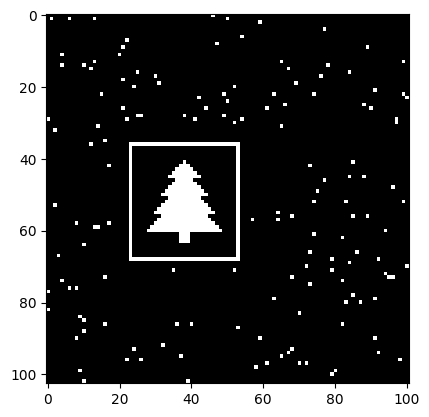

In [255]:
x, y, vx, vy = read_data()
for i in range(8159):
    x = (x + vx) % dx
    y = (y + vy) % dy

m = np.zeros((dy, dx))
m[y, x] = 1
plt.imshow(m, cmap="gray")